# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

Junzhou Jiang : 0963164

Zelong Hu : 0942976

In [15]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

## Handwritten digit recognition (5 points, 1+2+2)
The [MNIST dataset](https://www.openml.org/d/554) contains 70,000 images of handwritten digits (0-9) represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '4ef8c2ebcd1a13c5e2316fbe9e3103bf'

Class label: 5


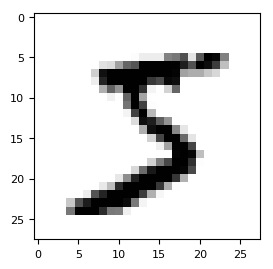

In [3]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
print("Class label:",y[0]) # Print the correct class label

- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 60,000 examples as the training set and the last 10,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?
- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?
    - Do the same but with 100 bootstrapping repeats. Are the results different? Explain.
- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?
    
Report all results clearly and interpret the results.  
Note: while prototyping/bugfixing, you can speed up experiments by taking a smaller sample of the data, but report your results as indicated above.

Evaluate a k-Nearest Neighbor classifier with its default settings.
KNN score: 0.968800


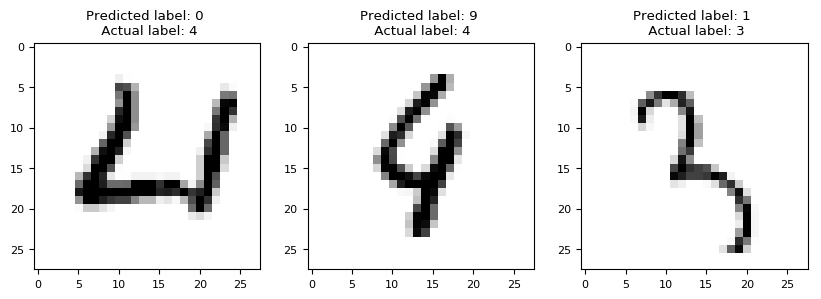

In [4]:
from sklearn import neighbors, linear_model

X_train, X_test = np.split(X,[60000])
y_train, y_test = np.split(y,[60000])
knn = neighbors.KNeighborsClassifier()

print("Evaluate a k-Nearest Neighbor classifier with its default settings.")

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

y_pred = knn.predict(X_test)
mis_num = 3
fig, axes = plt.subplots(1, mis_num, figsize=(10, 3))
i = 0
j = 0
while j < mis_num:
     if (y_pred[i] != y_test[i]):
         axes[j].imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray_r)
         axes[j].set_title("Predicted label: {} \n Actual label: {}".format(y_pred[i], y_test[i]))
         j += 1
     i+=1


The predictive accuracy is 0.9688, the images are actually easy to recognize.

Optimize the value for the number of neighbors  kk  (keep  kk  < 50) on a stratified subsample (e.g. 10%) of the data
Optimal k for kfold test:{'K': 5}
Best misclassification rate for kfold test:0.05469627272470823
Optimal k for bootstrap test:{'K': 3}
Best misclassification rate for bootstrap test:0.06059740259740265


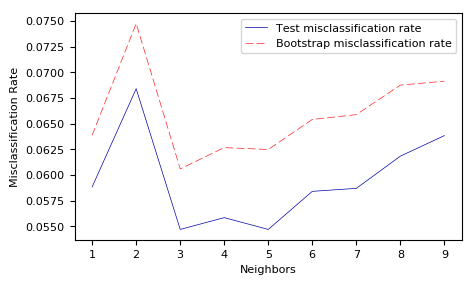

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import neighbors, linear_model
print("Optimize the value for the number of neighbors  kk  (keep  kk  < 50) on a stratified subsample (e.g. 10%) of the data")

X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, stratify=y)

bootstrap = ShuffleSplit(test_size=.33, train_size=.67, n_splits=100)

test_accuracy = []
bootstrap_accuracy = []

k = range(1,10)

score_1=1
score_2=1

for n_neighbors in k:
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    score = cross_val_score(knn, X_sample, y_sample, cv=10,n_jobs=-1) # cv=kFold
    misclassification_rate=1-score.mean()
    test_accuracy.append(misclassification_rate)
    if score_1 > misclassification_rate:
        score_1 = misclassification_rate
        optimal_k = {'K': n_neighbors}

    scores = cross_val_score(knn, X_sample, y_sample, cv=bootstrap)
    misclassification_rate=1-scores.mean()
    bootstrap_accuracy.append(misclassification_rate)
    if score_2 > misclassification_rate:
        score_2 = misclassification_rate
        optimal_k2 = {'K': n_neighbors}

# Plot the results
print("Optimal k for kfold test:{}".format(optimal_k))
print("Best misclassification rate for kfold test:{}".format(score_1))
print("Optimal k for bootstrap test:{}".format(optimal_k2))
print("Best misclassification rate for bootstrap test:{}".format(score_2))
plt.plot(k, test_accuracy, label="Test misclassification rate")
plt.plot(k, bootstrap_accuracy, label="Bootstrap misclassification rate")
plt.ylabel("Misclassification Rate")
plt.xlabel("Neighbors")
plt.legend(loc="best");
plt.show()

According to the 10-fold cross-validation results, the best k to consider is 5.
According to the 100 bootstrapping repeats, the best k to consider is 3. So the results are different. 

When we use cross-validation, the results by using sampling with and without replacement agree strongly in overall trend. But the misclassification rate obtained by 10 fold cross validation is lower than the respective score obtained by bootstrapping in the same k. This is because the former used 90% for training, while the latter only 67%.

In [17]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, stratify=y)

scores_knn = cross_val_score(KNeighborsClassifier(), X_sample, y_sample, n_jobs=-1, cv=10)
scores_lr = cross_val_score(LogisticRegression(), X_sample, y_sample, n_jobs=-1, cv=10)
scores_svc = cross_val_score(LinearSVC(), X_sample, y_sample, n_jobs=-1, cv=10)

print("First use the default hyperparameter settings")

print("Accuracy of kkn is {}".format(scores_knn.mean()))

print("Accuracy of logistic regression is {}".format(scores_lr.mean()))

print("Accuracy of linear svc is {}".format(scores_svc.mean()))



First use the default hyperparameter settings
Accuracy of kkn is 0.9382840023243417
Accuracy of logistic regression is 0.8451540823058064
Accuracy of linear svc is 0.8564155412576875


With default settings, the accuracy of knn is 0.9382840023243417, the accuracy of logistic regression is 0.8451540823058064, and the accuracy of linear SVM is 0.8564155412576875.

([<matplotlib.axis.XTick at 0x12691e048>,
 <a list of 9 Text xticklabel objects>)

Best C for LinearSVC with L1 penalty:{'C': 1, 'penalty': 'l1'}
Best Accuracy for LinearSVC with L1 penalty:0.8157347984344331
Best C for LinearSVC with L2 penalty:{'C': 0.0001, 'penalty': 'l2'}
Best Accuracy for LinearSVC with L2 penalty:0.8072048834603723
Best C for LogisticRegression with penalty L1:{'C': 10, 'penalty': 'l1'}
Best Accuracy for LogisticRegression with penalty L1:0.8244545960119667
Best C for LogisticRegression with penalty L2:{'C': 0.0001, 'penalty': 'l2'}
Best Accuracy for LogisticRegression with penalty L2:0.8216175110865458


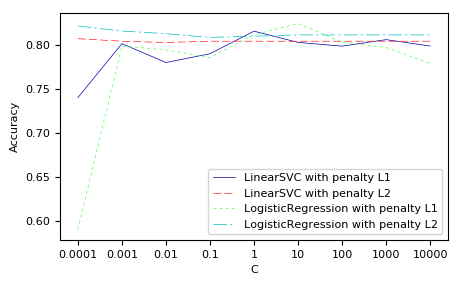

In [18]:
# Run for several parameters
#param_grid = { 'C': [0.0001,0.001,0.01,0.1, 1,10, 100,1000,10000], 'penalty': ["l1", "l2"] }
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.01, stratify=y)
Cextend=[1,2,3,4,5,6,7,8,9]
score_SVC1 = 0
score_SVC2 = 0
score_LG1 = 0
score_LG2 = 0
SVC_mis_rate_L1=[]
SVC_mis_rate_L2=[]
LR_mis_rate_L1=[]
LR_mis_rate_L2=[]
for m in [LinearSVC, LogisticRegression]:
    for penalty in ["l1", "l2"]:
        for C in [0.0001,0.001,0.01,0.1, 1,10, 100,1000,10000]:
            model = m(C=C, penalty=penalty, dual=False);
            results=[]
            scores = cross_val_score(model, X_sample, y_sample)
            accuracy=scores.mean()
            if m==LinearSVC:
                if penalty == "l1":
                    SVC_mis_rate_L1.append(accuracy)
                    if score_SVC1 < accuracy:
                        score_SVC1 = accuracy
                        Optimal_C_SVC1 = {'C': C, 'penalty':penalty}
                else:
                    SVC_mis_rate_L2.append(accuracy)
                    if score_SVC2 < accuracy:
                        score_SVC2 = accuracy
                        Optimal_C_SVC2 = {'C': C, 'penalty':penalty}
            else:
                if penalty == "l1":
                    LR_mis_rate_L1.append(accuracy)
                    if score_LG1 < accuracy:
                        score_LG1 = accuracy
                        Optimal_C_LG1 = {'C': C, 'penalty':penalty}
                else:
                    LR_mis_rate_L2.append(accuracy)
                    if score_LG2 < accuracy:
                        score_LG2 = accuracy
                        Optimal_C_LG2 = {'C': C, 'penalty':penalty}


# Plot the results
plt.xticks(Cextend, (0.0001,0.001,0.01,0.1, 1,10, 100,1000,10000))
plt.plot(Cextend, SVC_mis_rate_L1, label="LinearSVC with penalty L1")
plt.plot(Cextend, SVC_mis_rate_L2, label="LinearSVC with penalty L2")
plt.plot(Cextend, LR_mis_rate_L1, label="LogisticRegression with penalty L1")
plt.plot(Cextend, LR_mis_rate_L2, label="LogisticRegression with penalty L2")
plt.ylabel("Accuracy")
plt.xlabel("C")
_ = plt.legend()

# Print the result
print("Best C for LinearSVC with L1 penalty:{}".format(Optimal_C_SVC1))
print("Best Accuracy for LinearSVC with L1 penalty:{}".format(score_SVC1))
print("Best C for LinearSVC with L2 penalty:{}".format(Optimal_C_SVC2))
print("Best Accuracy for LinearSVC with L2 penalty:{}".format(score_SVC2))
print("Best C for LogisticRegression with penalty L1:{}".format(Optimal_C_LG1))
print("Best Accuracy for LogisticRegression with penalty L1:{}".format(score_LG1))
print("Best C for LogisticRegression with penalty L2:{}".format(Optimal_C_LG2))
print("Best Accuracy for LogisticRegression with penalty L2:{}".format(score_LG2))

Considering the time, we only do the LinearSVC and LogisticRegression for the third question. The logistic regression and the linear SVC can achieve accuracy below 0.85, but k-nearest neighbors is the best classification model because it's accuracy is around 0.94 while using the default parameter.

The choice of loss influences a little to the accuracy, it can be seen from the figure that L2 loss performs best with higher accuracy than L1 loss.

When the C value is low, the accuracy for L1 is lower. Thus the SVM produces a plane with a small margin, and uses few support vectors. So there exist overlap and ambiguity among the samples in the dataset. At the meantime, the separation surface near them is not completely linear.

## Model selection (4 points (2+2))
Study how RandomForest hyperparameters interact on the Ionosphere dataset (OpenML ID 59).

- Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time. Use a nested cross-validation and a grid search (or random search) over the possible values, and measure the AUC. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal AUC performance you find?
- Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow AUC$ with AUC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

Hint: Running this experiment can take a while, so start early and use a feasible grid/random search. Start with a coarse grid or few random search iterations.
Hint: Use a log scale (1,2,4,8,16,...) for $n\_estimators$. Vary $max\_features$ linearly between 1 and the total number of features. Note that, if you give $max\_features$ a float value, it will use it as [the percentage of the total number of features](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


In [39]:
# Global imports and settings
from preamble import *
oml.config.apikey = '4ef8c2ebcd1a13c5e2316fbe9e3103bf'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

ionosphere = oml.datasets.get_dataset(59) # Download Ionosphere data
X, y = ionosphere.get_data(target=ionosphere.default_target_attribute); # Get the predictors X and the labels y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

param_grid = {
    'max_features': range(1,X.shape[1] + 1),
    'n_estimators': [1,2,4,8,16,32,64,128,256,512]    
}

rf = RandomForestClassifier()

grid = GridSearchCV(rf, param_grid = param_grid)
scores = cross_val_score(grid, X, y, scoring="roc_auc")
print("Best cross-validation score (AUC): {:.3f}".format(scores.max()))

grid1 = GridSearchCV(rf, param_grid=param_grid, scoring="roc_auc")
grid1.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid1.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid1.best_score_))


Best cross-validation score (AUC): 0.975


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 35), 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)


Grid-Search with AUC
Best parameters: {'max_features': 2, 'n_estimators': 32}
Best cross-validation score (AUC): 0.964


In [40]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid1.cv_results_)
# Show the first 5 rows
display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,...,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.66e-03,6.15e-04,0.78,0.92,...,2.17e-04,4.69e-05,0.08,2.66e-02
1,2.97e-03,7.17e-04,0.88,0.96,...,9.08e-04,7.22e-05,0.01,1.27e-02
2,4.22e-03,8.00e-04,0.89,1.00,...,1.03e-04,2.53e-05,0.04,4.75e-04
3,8.97e-03,1.38e-03,0.95,1.00,...,8.85e-04,4.39e-04,0.03,1.48e-04
4,1.57e-02,1.52e-03,0.96,1.00,...,2.98e-04,2.90e-05,0.03,3.41e-05


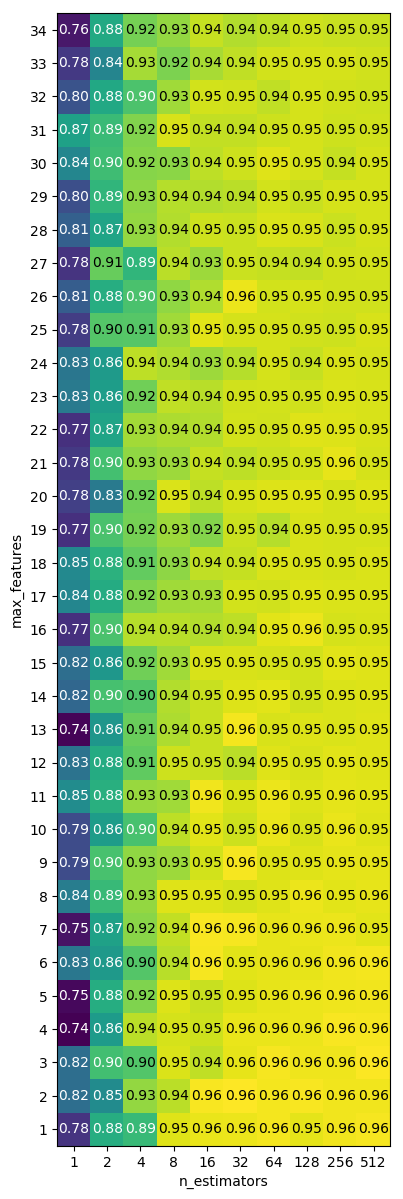

In [62]:
from matplotlib.collections import PolyCollection
import numpy as np
scores = np.array(results.mean_test_score).reshape(len(param_grid['max_features']), len(param_grid['n_estimators']))
# plot the mean cross-validation scores
plt.figure(figsize = (10,15))
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],
                      ylabel='max_features', yticklabels=param_grid['max_features'], cmap="viridis")
plt.show()

According to the result, the best models are build by using few features for each tree, and a lot of trees. The best score is obtain at 'max_features: 2, n_estimators: 32'. 

when the trees are build with few features, they can accurately model them. As a result, the whole forest is established by a lot of trees which are accurate on a particular subset of features. 

When the trees are built with more features, the misclassification rate will be high.

The number of features does not affect the performance of the model much. To improve the performance of the model the best way is to increase the number of trees. High number of trees will cause overfitting, so at a certain amount of tree, it will not help to improve more. That can be known that the best parameter of n_estimator is 32. 

## Decision tree heuristics (1 point)
Consider the toy training set created below. It predicts whether your date agrees to go out with you depending on the weather.

Learn a decision tree:

- Implement functions to calculate entropy and information gain
- What is the class entropy for the entire dataset? What is the information gain when you split the data using the *Water* feature?
- Implement a basic decision tree:
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).

In [21]:
import pandas as pd
df = pd.DataFrame({"Sky":['sunny','sunny','rainy','sunny','sunny'],
                   "AirTemp":['warm','warm','warm','cold','warm'],
                   "Humidity":['normal','high','high','high','normal'],
                   "Wind":['strong','strong','strong','strong','weak'],
                   "Water":['warm','warm','cool','warm','warm'],
                   "Forecast":['same','same','change','change','same'],
                   "Date?":['yes','yes','no','yes','no']
                   });
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']] # Fix column ordering
df # print

,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,warm,high,strong,cool,change,no
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


In [22]:
import numpy as np

def entropy(DataValue):
    value_v = DataValue.sum()
    p = float(value_v) / len(DataValue)
    if p>0:
        return -p *np.log2(p)
    else:
        return 0
    

def info_gain(pos1,neg1,pos2,neg2):
    total = pos1+pos2+neg1+neg2
    ent1 = entropy((pos1+pos2), (neg1+neg2))
    ent2 = entropy(pos1,neg1)
    ent3 = entropy(pos2,neg2)
    inf_gain = ent1 - ((((pos1+neg1)/total)*ent2)+(((pos2+neg2)/total)*ent3)) 
    return inf_gain


def split_function(Data, feature):
    Results = Data.groupby(feature)
    TEntropy = 0.0
    for key, group in Results:
        Entropy = entropy(group['Date?'] == 'no')
        TEntropy += Entropy * len(group) / len(Data)
    return TEntropy


def CreateDecisionTree(Data, target):
    def Dosplit(Data, columns, indent=0, detail=True):
       
        Basicentropy = entropy(Data[target] == 'yes')
        GoodValue = None
        for row in columns:
            Entro = split_function(Data, row)
            if detail:
                print('The information gain is {}, if splitting on {} '.format(Basicentropy - Entro, row))
                
            if not GoodValue or Entro < GoodValue[1]:
                GoodValue = row, Entro
        #comput the information gain 
        inforGain = Basicentropy - GoodValue[1]
        #analize the infoemation gian and then print out the result 
        if inforGain > 0:
            print('(--The information gain is {}, when split on {})'.format(inforGain, GoodValue[0]))
            
            S = list()
            for cell in columns:
                if cell != GoodValue[0]:
                    S.append(cell)
                    
            for Key, Sets in Data.groupby(GoodValue[0]):
                Total_y = (Sets[target] == 'yes').sum()
                print('The {} is {} (The number of "yes" is {}, the number of "no" is {})'.format(GoodValue[0], Key, Total_y, len(Sets) - Total_y ))
                Dosplit(Sets, S, indent + 2, detail)
        else:
            print('The information gain is less than 0')
        
    print('The decision tree is', target)
    
    columns = list()
    for cell in Data.columns:
        if cell != target:
            columns.append(cell)
            
    Dosplit(Data, columns, detail=True)

    #compute the entropy of the entire data, and the entorpy after split by using the water feature 
EntireDataseEntropy = entropy(df['Date?'] == 'yes')
waterEntropy = split_function(df, 'Water')

# call the decision tree function 
CreateDecisionTree(df, 'Date?')


print('The Entire entropy is', EntireDataseEntropy)
print('The information gain after splitting on water is', EntireDataseEntropy - waterEntropy)

The decision tree is Date?
The information gain is 0.04217935649972371, if splitting on Sky 
The information gain is 0.04217935649972371, if splitting on AirTemp 
The information gain is -0.07481314364450753, if splitting on Humidity 
The information gain is 0.04217935649972371, if splitting on Wind 
The information gain is 0.04217935649972371, if splitting on Water 
The information gain is -0.07481314364450753, if splitting on Forecast 
(--The information gain is 0.04217935649972371, when split on Sky)
The Sky is rainy (The number of "yes" is 0, the number of "no" is 1)
The information gain is 0.0, if splitting on AirTemp 
The information gain is 0.0, if splitting on Humidity 
The information gain is 0.0, if splitting on Wind 
The information gain is 0.0, if splitting on Water 
The information gain is 0.0, if splitting on Forecast 
The information gain is less than 0
The Sky is sunny (The number of "yes" is 3, the number of "no" is 1)
The information gain is -0.08496250072115619, if s

## Random Forests (4 points (1+1+2))
Study the effect of the number of trees in a RandomForest on the EEG-eye-state dataset (http://www.openml.org/d/1471). This dataset measures brain activity using 15 sensors, and you need to predict whether the person's eyes are open or closed. 

* Train a RandomForest classifier on this dataset with an increasing number of trees (on a log scale as above). Plot the Out-Of-Bag error against the number of trees.
    - The Out-Of-Bag error is the test error obtained when using bootstrapping, and using the non-drawn data points as the test set. This is what a RandomForest does internally, so you can retrieve it from the classifier. The code below hints on how to do this.
* Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error. Compare the two. What do you learn from this?
* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

Hint: Error rate = 1 - accuracy  
Hint: We discussed bias-variance decomposition in class. It is not included in scikit-learn, so you'll need to implement it yourself.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

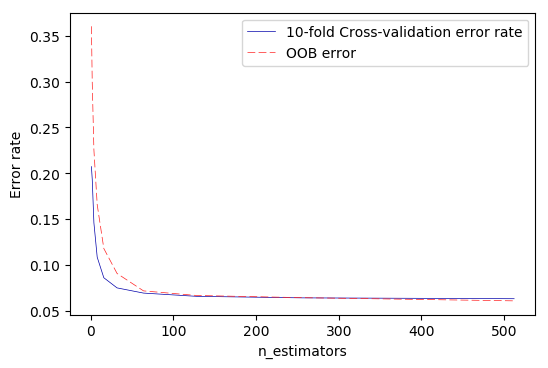

In [75]:
from preamble import *
oml.config.apikey = '4ef8c2ebcd1a13c5e2316fbe9e3103bf'

eeg = oml.datasets.get_dataset(1471) # Download Ionosphere data
X, y = eeg.get_data(target=eeg.default_target_attribute);

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

perm = np.random.permutation(X.shape[0])
X = X[perm]
y = y[perm]
num_trees = [2**i for i in range(10)]

error_rate, scores_oob = [], []
for nt in num_trees:
    rf = RandomForestClassifier(n_estimators=nt, oob_score=True, n_jobs=-1);
    rf.fit(X, y);
    scores_oob.append(1 - rf.oob_score_);
    
    rf = RandomForestClassifier(n_estimators=nt);
    accuracies = cross_val_score(rf, X, y, cv=10, n_jobs=-1, scoring='accuracy')
    error_rate.append(1-accuracies.mean())

plt.plot(num_trees, error_rate, label="10-fold Cross-validation error rate")
plt.plot(num_trees, scores_oob, label="OOB error")
plt.xlabel("n_estimators")
plt.ylabel("Error rate")
plt.legend(loc="upper right")
plt.show()


The OBB error is higher than the 10-fold cross validation error ratethe number of trees grows, the error rate of the two items tend to be the same. Then reason is that while calculating a OOB error, the prediction for a sample is based on a smaller number of trees. And when the number of trees grows, the effect will decrease.

In [5]:
from preamble import *
oml.config.apikey = '4ef8c2ebcd1a13c5e2316fbe9e3103bf'

eeg = oml.datasets.get_dataset(1471) # Download Ionosphere data
X, y = eeg.get_data(target=eeg.default_target_attribute);

from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
shuffle_split = ShuffleSplit(test_size=0.33, n_splits = 100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 0
)


def calculate_bias_var(X, y, ftype):
    n_repeat = 100
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        ftype.fit(X[train_index], y[train_index])
        y_pred = ftype.predict(X[test_index])

        # Store predictions
        for i,index in enumerate(test_index):
            y_all_pred[index].append(y_pred[i])
        
    # Compute bias, variance, error
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
            for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
           for i,x in enumerate(y_all_pred)])
    return bias_sq, var
    
    
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1);
rf.fit(Xtrain, ytrain);
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
bias_rf, var_rf = calculate_bias_var(X, y, rf)
print('Random forest with 10 estimators')
print('AUC: {}'.format(rf_auc))
print('Bias: {}'.format(bias_rf))
print('Variance: {}'.format(var_rf))

dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
dt_auc = roc_auc_score(ytest, dt.predict_proba(Xtest)[:, 1])
bias_dt, var_dt = calculate_bias_var(X, y, dt)

print('\nSingle decision tree')
print('AUC: {}'.format(dt_auc))
print('Bias: {}'.format(bias_dt))
print('Variance: {}'.format(var_dt))


Random forest with 10 estimators
AUC: 0.9606189549349211
Bias: 286.0357373093923
Variance: 264.66426269061117

Single decision tree
AUC: 0.834042234261222
Bias: 324.68942420834594
Variance: 531.7105757916383


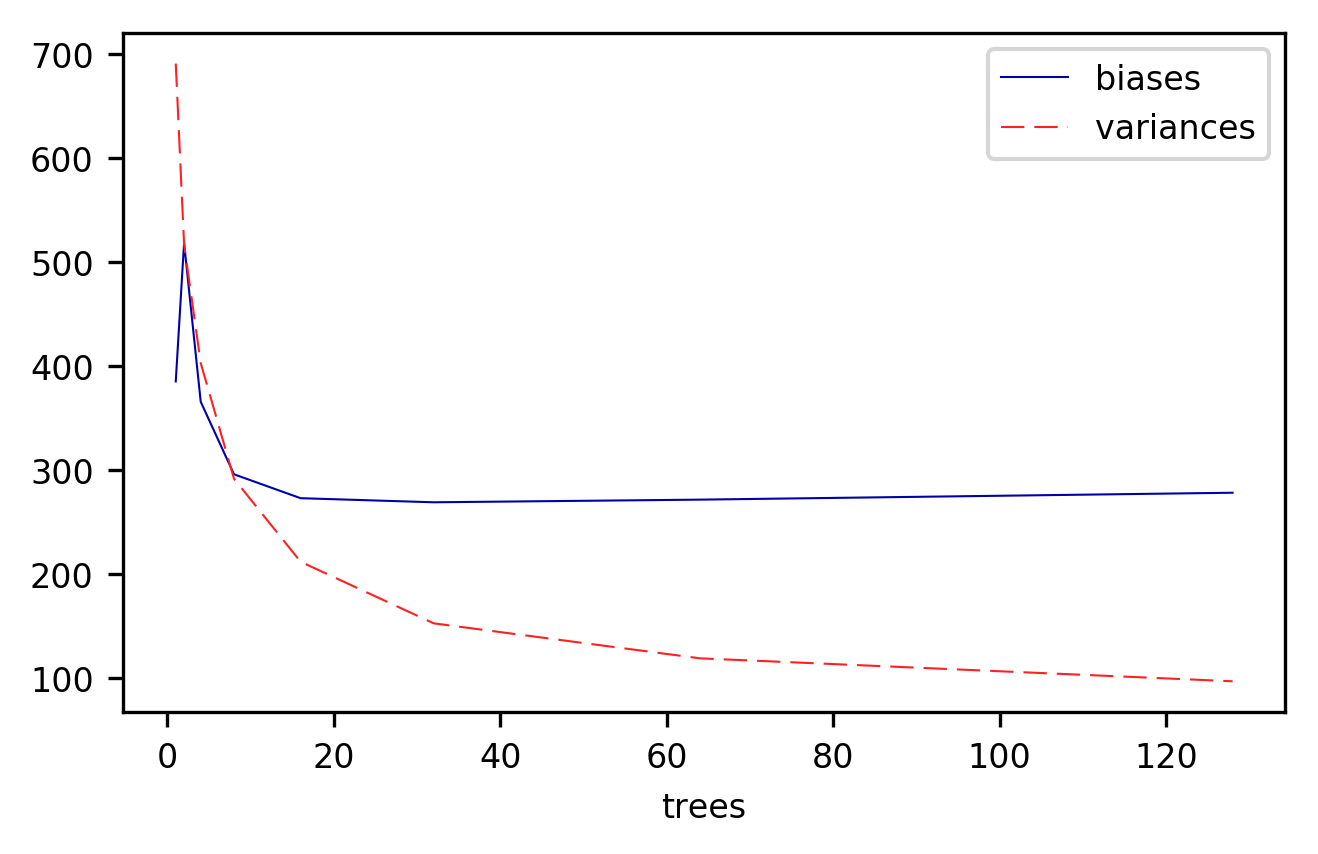

In [10]:
num_trees = [2**i for i in range(8)]
bootstraps = 100
    
biases, variances = [], []
for nt in num_trees:
    rfc = RandomForestClassifier(n_estimators=nt, n_jobs=-1);
    bias, var = calculate_bias_var(X, y, rfc)
    biases.append(bias)
    variances.append(var)
    
plt.plot(num_trees, biases, label="biases")
plt.plot(num_trees, variances, label="variances")
plt.xlabel("trees")
plt.legend(loc="upper right")
plt.show()   

As the number of trees in the forest grows, bias decreases and variance both decrease. Up to a certain point, around 20 trees, bias starts to level off.